- <h1 style="background-color: navy; color: white; padding: 10px; text-align: center; border-radius: 8px; margin: 20px 0; font-family: 'Arial', sans-serif; font-weight: bold;"> Data Analysis for a Superstore in USA Using Python</h1>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px

In [ ]:
qwen ai

In [3]:
## Load Superstore dataset

superst = pd.read_excel("My analysis/Superstore 2014.xlsx")

superst.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,7,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.28,4,0.0,1.9656
1,10,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.90,5,0.0,34.4700
2,172,CA-2014-118962,2014-08-05,2014-08-09,Standard Class,CS-12130,Chad Sievert,Consumer,United States,Los Angeles,...,90004,West,OFF-PA-10000659,Office Supplies,Paper,"Adams Phone Message Book, Professional, 400 Me...",20.94,3,0.0,9.8418
3,173,CA-2014-118962,2014-08-05,2014-08-09,Standard Class,CS-12130,Chad Sievert,Consumer,United States,Los Angeles,...,90004,West,OFF-PA-10001144,Office Supplies,Paper,Xerox 1913,110.96,2,0.0,53.2608
4,1143,CA-2014-146969,2014-09-29,2014-10-03,Standard Class,AP-10915,Arthur Prichep,Consumer,United States,Los Angeles,...,90045,West,OFF-FA-10001561,Office Supplies,Fasteners,Stockwell Push Pins,8.72,4,0.0,2.8776


In [4]:
# How many rows and columns are in the dataset

rows, columns = superst.shape

print(f"The Superstore dataset has {rows} rows and {columns} columns.")

The Superstore dataset has 1993 rows and 21 columns.


In [5]:
superst.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1993 entries, 0 to 1992
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         1993 non-null   int64         
 1   Order ID       1993 non-null   object        
 2   Order Date     1993 non-null   datetime64[ns]
 3   Ship Date      1993 non-null   datetime64[ns]
 4   Ship Mode      1993 non-null   object        
 5   Customer ID    1993 non-null   object        
 6   Customer Name  1993 non-null   object        
 7   Segment        1993 non-null   object        
 8   Country        1993 non-null   object        
 9   City           1993 non-null   object        
 10  State          1993 non-null   object        
 11  Postal Code    1993 non-null   int64         
 12  Region         1993 non-null   object        
 13  Product ID     1993 non-null   object        
 14  Category       1993 non-null   object        
 15  Sub-Category   1993 n

## 💾 The Superstore data description


| Column Name | Description | Data Type |
|-------------|-------------|-----------|
| `Row ID` | Unique identifier for each row | Integer 
| `Order ID` | Unique identifier for a customer order | String 
| `Order Date` | Date when the order was placed | Date 
| `Ship Date` | Date when the order was shipped to the customer | Date 
| `Ship Mode` | Shipping method used | String 
| `Customer ID` | Unique identifier for a customer | String 
| `Customer Name` | Name of the customer | String 
| `Segment` | Customer segment | String 
| `Country` | Country where the customer is located | String 
| `City` | City of the customer’s location | String 
| `State` | State of the customer’s location | String 
| `Postal Code` | ZIP code of the customer’s location | Integer 
| `Region` | Geographic region | String 
| `Product ID` | Unique identifier for a product | String 
| `Category` | Broad product category | String 
| `Sub-Category` | Subdivision of the category | String 
| `Product Name` | Name of the product | String
| `Sales` | Revenue generated from the sale | Float
| `Quantity` | Number of units sold | Integer
| `Discount` | Discount applied to the order | Float
| `Profit` | Profit earned from the sale (sales minus cost) | Float

<span style="background-color:DarkSlateGray;
             color:LightCyan;
             font-size:40px;
             text-align:center;
               border-radius:20px 70px;
             font-weight:bold;
              padding:25px 80px;"> SUPERSTORE DATASET CLEANING PROCESS
</span>

### 1) Identifying dulicates in the  Superstore Dataset

In [6]:
superst[superst.duplicated()]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit


#### There are no duplicates in the dataset

### 2) Drop unwanted columns (Row ID, Order ID, Country, Postal Code, Product ID)

In [7]:
superst.drop(columns = ['Row ID', 'Order ID', 'Country', 'Postal Code', 'Product ID'], inplace = True)
superst.head()

,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,Los Angeles,California,West,Office Supplies,Art,Newell 322,7.28,4,0.0,1.9656
1,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,Los Angeles,California,West,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.90,5,0.0,34.4700
2,2014-08-05,2014-08-09,Standard Class,CS-12130,Chad Sievert,Consumer,Los Angeles,California,West,Office Supplies,Paper,"Adams Phone Message Book, Professional, 400 Me...",20.94,3,0.0,9.8418
3,2014-08-05,2014-08-09,Standard Class,CS-12130,Chad Sievert,Consumer,Los Angeles,California,West,Office Supplies,Paper,Xerox 1913,110.96,2,0.0,53.2608
4,2014-09-29,2014-10-03,Standard Class,AP-10915,Arthur Prichep,Consumer,Los Angeles,California,West,Office Supplies,Fasteners,Stockwell Push Pins,8.72,4,0.0,2.8776


### 3) Add wanted columns (Delivery Time (Days), Cost)

In [8]:
# For Delivery Time (Days)
superst["Delivery Time (Days)"] = (superst["Ship Date"] - superst["Order Date"]).dt.days

# For Cost
superst["Cost"] = superst["Sales"] - superst["Profit"]

In [9]:
superst.head()

,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Delivery Time (Days),Cost
0,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,Los Angeles,California,West,Office Supplies,Art,Newell 322,7.28,4,0.0,1.9656,5,5.3144
1,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,Los Angeles,California,West,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.90,5,0.0,34.4700,5,80.4300
2,2014-08-05,2014-08-09,Standard Class,CS-12130,Chad Sievert,Consumer,Los Angeles,California,West,Office Supplies,Paper,"Adams Phone Message Book, Professional, 400 Me...",20.94,3,0.0,9.8418,4,11.0982
3,2014-08-05,2014-08-09,Standard Class,CS-12130,Chad Sievert,Consumer,Los Angeles,California,West,Office Supplies,Paper,Xerox 1913,110.96,2,0.0,53.2608,4,57.6992
4,2014-09-29,2014-10-03,Standard Class,AP-10915,Arthur Prichep,Consumer,Los Angeles,California,West,Office Supplies,Fasteners,Stockwell Push Pins,8.72,4,0.0,2.8776,4,5.8424


<span style="background-color:DarkSlateGray;
             color:LightCyan;
             font-size:40px;
             text-align:center;
               border-radius:20px 70px;
             font-weight:bold;
              padding:25px 80px;"> ANALYZING THE SUPERSTORE DATASET
</span>

### 4) Calculate Total Sales and Total Quantity Sold.

In [10]:
# Checking the year all items are ordered

year_for_all_items = superst["Order Date"].dt.year

print(f"All the items in the dataset were ordered in year {year_for_all_items.unique()[0]}")

All the items in the dataset were ordered in year 2014


In [11]:
# Findng the Total Sales and Total Quantity Sold in year 2014

Total_Sales = superst['Sales'].sum()

Total_Quantity_Sold = superst['Quantity'].sum()

print(f"Total Sales in 2014: ${Total_Sales:.2f}")
print(f"Total Quantity Sold in 2014: {Total_Quantity_Sold}")

Total Sales in 2014: $484247.50
Total Quantity Sold in 2014: 7581


#### In 2014,

#### Total Sales is $484,247.50

#### Total Quantity Sold is 7581

### 5) Identify the Top 5 Best-Selling Products by Total Sales

In [12]:
five_best_sell = superst.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(5)
print("The Top 5 Best-Selling Products by Total Sales:")
print(five_best_sell)

The Top 5 Best-Selling Products by Total Sales:
Product Name
Cisco TelePresence System EX90 Videoconferencing Unit        22638.480
Lexmark MX611dhe Monochrome Laser Printer                    11219.934
HP Designjet T520 Inkjet Large Format Printer - 24" Color     9624.945
Ibico EPK-21 Electric Binding System                          9449.950
High Speed Automatic Electric Letter Opener                   8187.650
Name: Sales, dtype: float64


#### The Top 5 Best-Selling Products by Total Sales are 

#### Cisco TelePresence System EX90 Videoconferencing Unit:-        $22,638.480

#### Lexmark MX611dhe Monochrome Laser Printer:-                   $11,219.934

#### HP Designjet T520 Inkjet Large Format Printer - 24" Color:-     $9,624.945

#### Ibico EPK-21 Electric Binding System:-                          $9,449.950

#### High Speed Automatic Electric Letter Opener:-                   $8,187.650

### 6) Identify the 5 Worst-Selling Products by Total Sales

In [13]:
five_worst_sell = superst.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).tail(5)
print("The Top 5 Worst-Selling Products by Total Sales:")
print(five_worst_sell)

The Top 5 Worst-Selling Products by Total Sales:
Product Name
Presstex Flexible Ring Binders                                       1.365
Computer Printout Index Tabs                                         1.344
Universal Recycled Hanging Pressboard Report Binders, Letter Size    1.234
Avery Binder Labels                                                  1.167
Avery Round Ring Poly Binders                                        0.852
Name: Sales, dtype: float64


#### The least 5 Worst-Selling Products by Total Sales are 

#### Presstex Flexible Ring Binders:-        $1.365

#### Computer Printout Index Tabs:-                   $1.344

#### Universal Recycled Hanging Pressboard Report Binders, Letter Size:-     $1.234

#### Avery Binder Labels:-                          $1.167

#### Avery Round Ring Poly Binders:-                   $0.852

### 7) Determine the Region with the Highest and Lowest Revenue

In [14]:
# We will assume that Sales = Revenue because
# Sales in this dataset represent the amount paid for the quantity ordered

region_revenue = superst.groupby('Region')['Sales'].sum().sort_values(ascending=True)
print("Regions and their Revenues:")
print(region_revenue)

Regions and their Revenues:
Region
Central    103838.1646
South      103845.8435
East       128680.4570
West       147883.0330
Name: Sales, dtype: float64


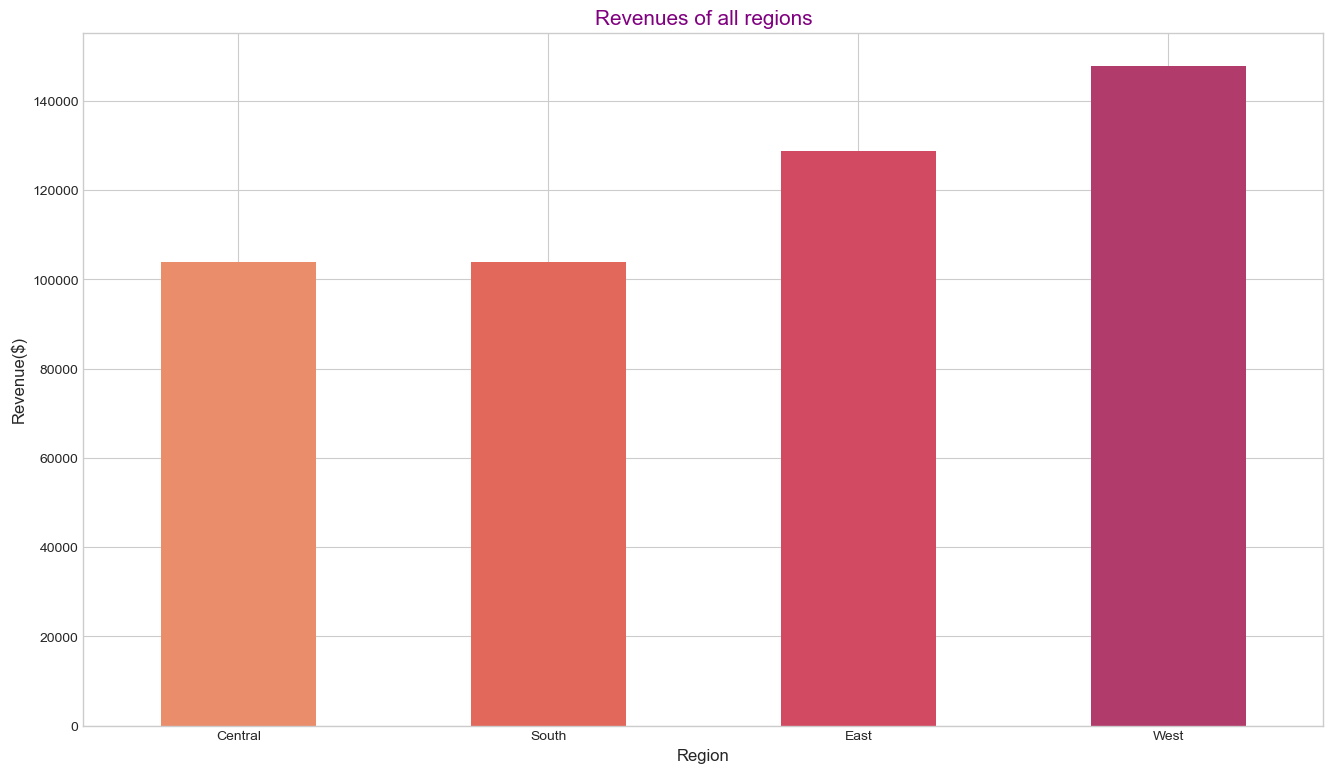

In [21]:
region_revenue.plot(kind = 'bar',
                    figsize=(16, 9),
                    color = sns.color_palette('flare'))
plt.xlabel('Region', fontsize = 12)
plt.ylabel('Revenue($)', fontsize = 12)
plt.xticks(rotation = 360)
plt.title('Revenues of all regions', fontsize = 15, color = 'purple')
plt.savefig('Revenues of all regions.png', dpi=300, bbox_inches='tight')
plt.show()

#### The Region with the highest revenue is WEST in the amount of $147,883.033

#### The Region with the lowest revenue is CENTRAL in the amount of $103,838.1646

### 8) Analyze monthly sales trends 
### i) Which months have the highest and lowest sales? and 
### ii) Identify any seasonal patterns or spikes in sales

In [16]:
# Showing monthly total sales

monthly_sales = superst.groupby(superst['Order Date'].dt.month)['Sales'].sum()

monthly_sales

Order Date
1     14236.8950
2      4519.8920
3     55691.0090
4     28295.3450
5     23648.2870
6     34595.1276
7     33946.3930
8     27909.4685
9     81777.3508
10    31453.3930
11    78628.7167
12    69545.6205
Name: Sales, dtype: float64

In [17]:
# Mapping monthly index with month name

month_mapping = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
             7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}

monthly_sales.index = monthly_sales.index.map(month_mapping)
print(monthly_sales)

Order Date
January      14236.8950
February      4519.8920
March        55691.0090
April        28295.3450
May          23648.2870
June         34595.1276
July         33946.3930
August       27909.4685
September    81777.3508
October      31453.3930
November     78628.7167
December     69545.6205
Name: Sales, dtype: float64


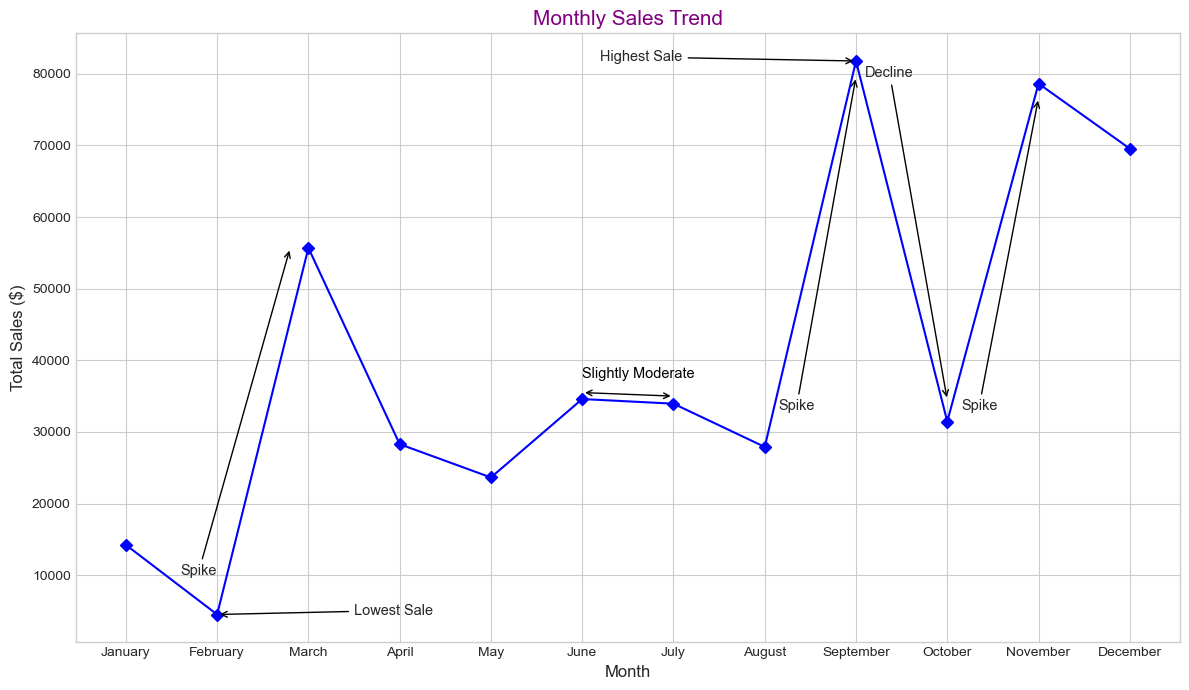

In [19]:
# Plotting Monthly Sales Trend

plt.style.use('default')
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(12, 7))
plt.plot(monthly_sales, marker='D', color='b')
plt.title('Monthly Sales Trend', fontsize = 15, color = 'purple')

plt.annotate('Highest Sale', 
             xy=(8, 81777.3508), 
             xytext=(5.2, 81777.3508),
             arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize = 10.5)

plt.annotate('Lowest Sale', 
             xy=(1, 4519.8920), 
             xytext=(2.5, 4519.8920),
             arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize = 10.5)

plt.annotate('Spike', 
             xy=(1.8, 55691.0090), 
             xytext=(0.6, 10000),
             arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize = 10.5)

plt.annotate('Spike', 
             xy=(8, 79600.3508), 
             xytext=(7.15, 33000),
             arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize = 10.5)

plt.annotate('Spike', 
             xy=(10, 76628.7167), 
             xytext=(9.15, 33000),
             arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize = 10.5)

plt.annotate('Decline', 
             xy=(9, 34453.3930), 
             xytext=(8.1, 79600.3508),
             arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize = 10.5)

plt.annotate('Slightly Moderate', 
             xy=(5, 37500), 
             xytext=(5, 37500), fontsize = 10.5, color = 'black')

plt.annotate('', 
             xy=(5, 35500), 
             xytext=(6, 35000),
             arrowprops=dict(arrowstyle='<->', color='black'))

plt.xlabel('Month', fontsize = 12)
plt.ylabel('Total Sales ($)', fontsize = 12)
plt.tight_layout()
plt.savefig('Monthly_sales_trend.png', dpi=300, bbox_inches='tight')
plt.show()

#### The Month with the highest sale is September in the amount of $81,777.3508

#### The Month with the lowest sale is February in the amount of $4,519.8920

#### There was surge in sales in February to March, August to September and October to November.

#### There was a decline in sales in September to October

#### From June to July, there was slight difference in sales (not significant)

### 9) Delivery Time Analysis by Ship Mode

In [172]:
# Showing Ship mode delivery performance with Average and maximum delivery time, Total Sales and Profit, Order Count of ship mode

ship_mode_delivery = superst.groupby("Ship Mode").agg(Avg_Delivery_Time = ("Delivery Time (Days)", "mean"),
                                                      Max_Delivery_Time = ("Delivery Time (Days)", "max"),
                                                      Total_Sales = ('Sales', 'sum'),
                                                      Total_Profit = ('Profit', 'sum'),
                                                      Order_Count = ('Ship Mode', 'count')).reset_index()

print("Delivery Performance:")
print(ship_mode_delivery)

Delivery Performance:
        Ship Mode  Avg_Delivery_Time  Max_Delivery_Time  Total_Sales  \
0     First Class           2.250859                  4   59769.2645   
1        Same Day           0.022222                  1   17470.1340   
2    Second Class           3.230971                  5  101386.7800   
3  Standard Class           4.937449                  7  305621.3196   

   Total_Profit  Order_Count  
0     9073.5332          291  
1     2755.5071           90  
2     9759.4570          381  
3    27955.4768         1231  


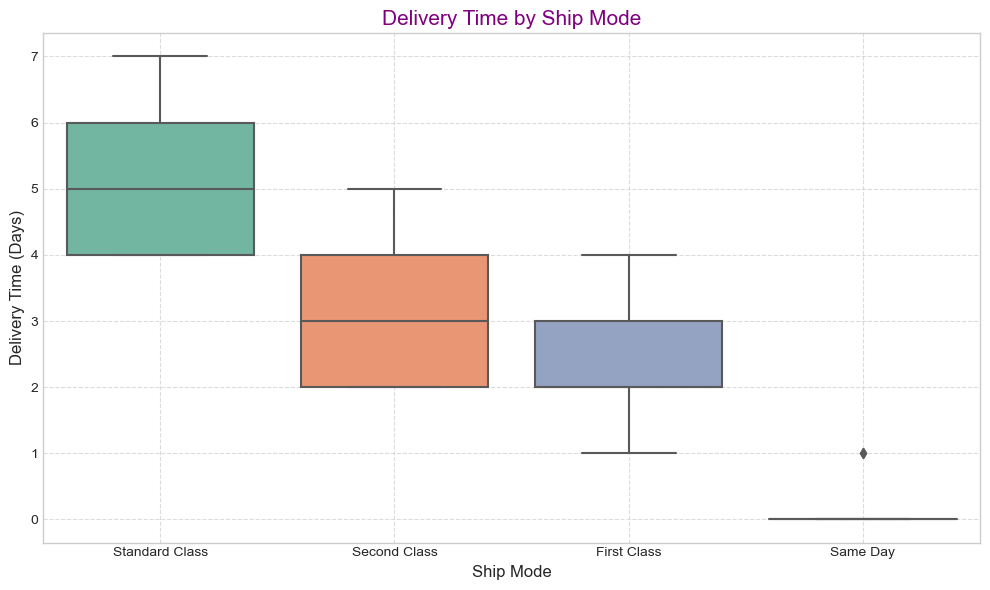

In [135]:
# Box plot showing shop mode delivery time range in days

plt.figure(figsize=(10, 6))
sns.boxplot(data = superst, x='Ship Mode', y="Delivery Time (Days)", palette='Set2')
plt.title('Delivery Time by Ship Mode', fontsize = 15, color = 'purple')
plt.xlabel('Ship Mode', fontsize=12)
plt.ylabel('Delivery Time (Days)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

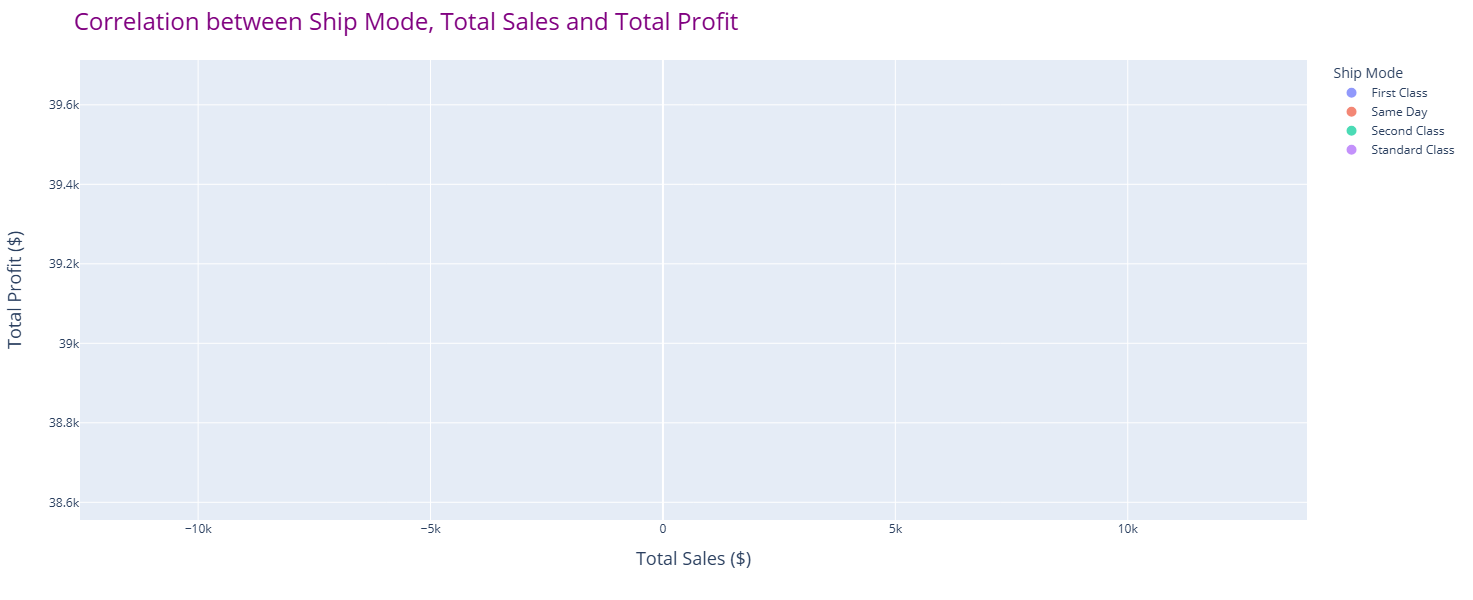

In [183]:
# Showing Correlation between Ship Mode, Total Sales and Total Profit

fig = px.scatter(ship_mode_delivery, x='Total_Sales', y='Total_Profit', size='Order_Count', color='Ship Mode', size_max=40)

fig.update_layout(title={'text': f'Correlation between Ship Mode, Total Sales and Total Profit',
                             'font': {'size': 24, 'color': 'purple'}},
                      xaxis_title={'text': 'Total Sales ($) ',
                                   'font': {'size': 18}},
                      yaxis_title={'text': 'Total Profit ($)',
                                   'font': {'size': 18}},
                      width=900,
                      height=600)

#### Insights in Delivery Time by Ship Mode and Correlation between Ship Mode, Total Sales and Total Profit images above shows :-

#### Same Day: Takes only one day to deliver, but people rarely use the service, it also generates the lowest profit. 

#### First Class: Is the fastest delivery method after same day delivery, Average delivery is 2 days, maximum of 4 days, but it also generates low profit

#### Second Class: is slower compared to first class, Average delivery is 3 days, maximum of 5 days , generates more profit than first class. However, the total sales is significantly higher than that first class

#### Standard Class : is the slowest means of shipping, Average delivery is roughly 5 days, maximum of 7 days, however, it generates the largest sales, profit and order count

### 10) Analysis of the Customer Segment

In [180]:
# Segment by Total Sales, Profit and Average Cost 

segment_performance = superst.groupby("Segment").agg(Total_Sales=("Sales", "sum"),
                                                     Total_Profit=("Profit", "sum"),
                                                     Average_Cost=("Cost", "mean"),
                                                     Order_Count = ('Segment', 'count')).reset_index()

print("Segment Performance:")
print(segment_performance)

Segment Performance:
       Segment  Total_Sales  Total_Profit  Average_Cost  Order_Count
0     Consumer  266096.8126    24319.8504    225.959778         1070
1    Corporate  128434.8737    13513.2769    188.087720          611
2  Home Office   89715.8118    11710.8468    250.015913          312


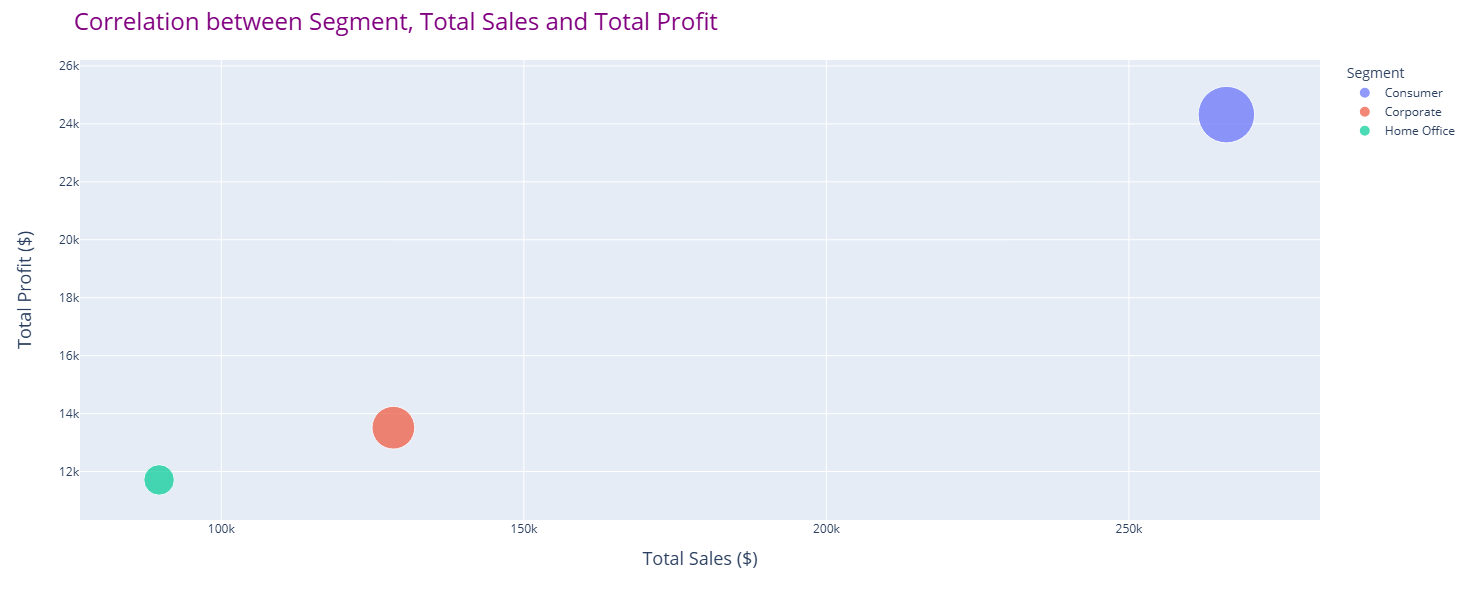

In [224]:
# Showing Correlation between Segment, Total Sales, Average_Cost and Total Profit

fig = px.scatter(segment_performance, x='Total_Sales', y='Total_Profit', size='Order_Count', color='Segment', size_max=40)

fig.update_layout(title={'text': f'Correlation between Segment, Total Sales and Total Profit',
                             'font': {'size': 24, 'color': 'purple'}},
                      xaxis_title={'text': 'Total Sales ($) ',
                                   'font': {'size': 18}},
                      yaxis_title={'text': 'Total Profit ($)',
                                   'font': {'size': 18}},
                      width=900,
                      height=600)

#### Insights in Correlation between Segment, Total Sales and Total Profit image above shows :-

#### Consumer Segment : Drives the most sales and profit.

#### Home Office : Highest average cost per order. 

### 11) Impact of Discounts on Superstore Profit

In [190]:
# Showing the impact of discount on Profit

superst['Original Revenue'] = superst['Sales'] / (1 - superst['Discount'])

discount_summary = a_copy.groupby('Discount').agg({'Sales': 'sum',
                                                   'Profit': 'sum',
                                                   'Original Revenue': 'sum',
                                                   'Cost': 'sum'}).reset_index()

print(discount_summary)

    Discount        Sales      Profit  Original Revenue         Cost
0       0.00  214959.7300  58617.1665         214959.73  156342.5635
1       0.10    8721.8640   1285.0918           9690.96    7436.7722
2       0.15    4995.6030    109.0593           5877.18    4886.5437
3       0.20  151245.0400  17576.5348         189056.30  133668.5052
4       0.30   26696.8730  -1981.4933          38138.39   28678.3663
5       0.32     561.5916   -130.1043            825.87     691.6959
6       0.40   35263.9740  -6869.7335          58773.29   42133.7075
7       0.45     174.0585   -110.7645            316.47     284.8230
8       0.50   31084.3650  -5640.6087          62168.73   36724.9737
9       0.60     880.8960   -627.6601           2202.24    1508.5561
10      0.70    4879.4910  -4167.4659          16264.97    9046.9569
11      0.80    4784.0120  -8516.0480          23920.06   13300.0600


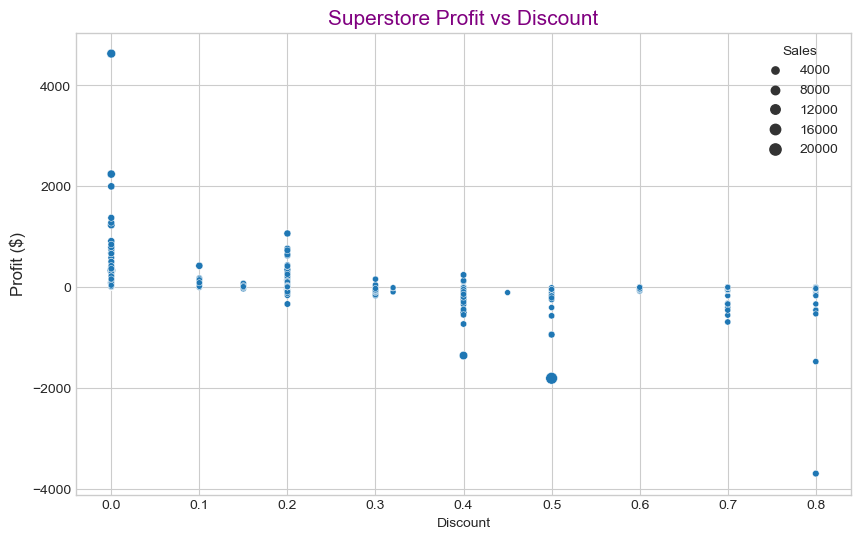

In [20]:
# A Scatter plot showing the relationship between Profit and discount
plt.figure(figsize=(10, 6))
sns.scatterplot(x = 'Discount', y = 'Profit', size = 'Sales', data = superst)
plt.title('Superstore Profit vs Discount', fontsize = 15, color = 'purple')
plt.ylabel('Profit ($)', fontsize=12)
plt.savefig('Superstore Profit vs Discount.png', dpi=300, bbox_inches='tight')
plt.show()

#### Key Takeaways from Superstore Profit vs Discount image above:

#### 1) Signifies that 0% discounts attracts the highest profits (in result leads to higher margins), usually the sales price is always higher than the cost price
#### 2) 20% discounts and above often attract losses (significantly sometimes, e.g In whe 0.8 discount was applied, the store recored - $8000+ loss), usually the sales price is always lower than the cost price

### 12) Category and Sub Category Performance

In [198]:
superst.head()

,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Delivery Time (Days),Cost,Original Revenue
0,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,Los Angeles,California,West,Office Supplies,Art,Newell 322,7.28,4,0.0,1.9656,5,5.3144,7.28
1,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,Los Angeles,California,West,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.90,5,0.0,34.4700,5,80.4300,114.90
2,2014-08-05,2014-08-09,Standard Class,CS-12130,Chad Sievert,Consumer,Los Angeles,California,West,Office Supplies,Paper,"Adams Phone Message Book, Professional, 400 Me...",20.94,3,0.0,9.8418,4,11.0982,20.94
3,2014-08-05,2014-08-09,Standard Class,CS-12130,Chad Sievert,Consumer,Los Angeles,California,West,Office Supplies,Paper,Xerox 1913,110.96,2,0.0,53.2608,4,57.6992,110.96
4,2014-09-29,2014-10-03,Standard Class,AP-10915,Arthur Prichep,Consumer,Los Angeles,California,West,Office Supplies,Fasteners,Stockwell Push Pins,8.72,4,0.0,2.8776,4,5.8424,8.72


In [208]:
# Checking Category by total sales, profit and Sub category count

category_performance = superst.groupby("Category").agg(Total_Sales=("Sales", "sum"),
                                                       Total_Profit=("Profit", "sum"),
                                                       Sub_Category = ("Sub-Category", "nunique")).reset_index()

print("\nCategory Performance:")
print(category_performance.sort_values("Total_Profit"))


Category Performance:
          Category  Total_Sales  Total_Profit  Sub_Category
0        Furniture  157192.8531     5457.7255             4
2       Technology  175278.2330    21492.8325             4
1  Office Supplies  151776.4120    22593.4161             9


In [226]:
# Checking Category by Sub category, total sales and profit

category_summary = superst.groupby(["Category", "Sub-Category"]).agg(Total_Sales=("Sales", "sum"),
                                                                     Profit_Margin=("Profit", lambda x: (sum(x) / sum(superst["Sales"])) * 100)).reset_index()

category_summary

,Category,Sub-Category,Total_Sales,Profit_Margin
0,Furniture,Bookcases,20036.6776,-0.071486
1,Furniture,Chairs,77241.5760,1.436259
2,Furniture,Furnishings,13826.2340,0.407414
3,Furniture,Tables,46088.3655,-0.645133
4,Office Supplies,Appliances,15313.6250,0.507901
5,Office Supplies,Art,6057.9820,0.290513
6,Office Supplies,Binders,43488.2650,0.978780
7,Office Supplies,Envelopes,3855.7500,0.308825
8,Office Supplies,Fasteners,661.3280,0.036873
9,Office Supplies,Labels,2841.3940,0.265568


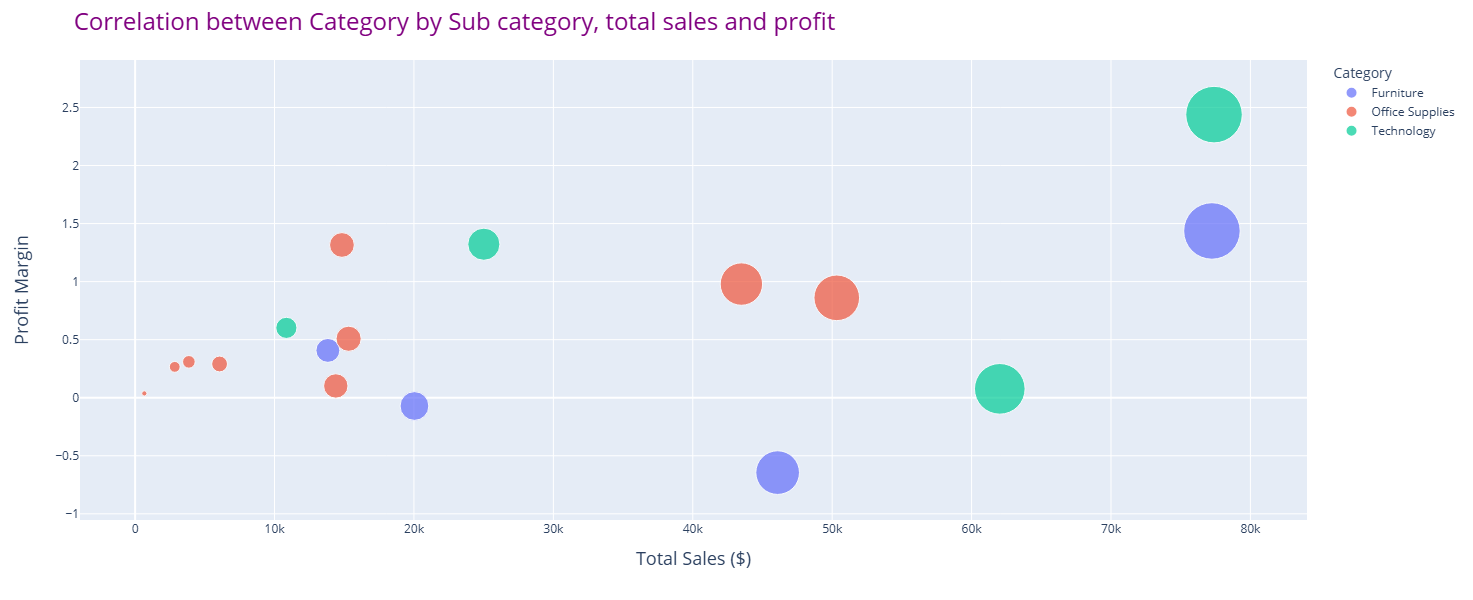

In [225]:
# Showing Correlation between Segment, Total Sales, Average_Cost and Total Profit

fig = px.scatter(category_summary, x='Total_Sales', y='Profit_Margin', size='Total_Sales', color='Category', hover_name='Sub-Category', size_max=40)

fig.update_layout(title={'text': f'Correlation between Category by Sub category, total sales and profit',
                             'font': {'size': 24, 'color': 'purple'}},
                      xaxis_title={'text': 'Total Sales ($) ',
                                   'font': {'size': 18}},
                      yaxis_title={'text': 'Profit Margin',
                                   'font': {'size': 18}},
                      width=900,
                      height=600)

#### Correlation between Category by Sub category, total sales and profit image above shows that:-

#### The largest profit was generated in Office Supplies Category (probably because it has the largest sub category of 9)

#### The least profit was generated in Furniture Category, with negative profit margin recorded in its sub categories (Bookcases and Tables)

#### Despite the fact that Technology Category has the highest number of sales, it still didn't make as much profit has Office Supplies Category

### 13) 5 top and least customer names for rewards and incentives

In [240]:
# Customer names by total sales

customer_sales = superst.groupby('Customer Name')['Sales'].sum().reset_index()
customer_sales

,Customer Name,Sales
0,Aaron Bergman,322.216
1,Aaron Hawkins,648.286
2,Aaron Smayling,65.780
3,Adam Hart,5.220
4,Adam Shillingsburg,707.962
...,...,...
590,William Brown,1857.598
591,Xylona Preis,1054.794
592,Yoseph Carroll,3116.490
593,Zuschuss Carroll,1588.746


In [294]:
# Top 10 customers by total sales for rewards
top_10_customers = customer_sales.sort_values('Sales', ascending=False).head(10)

# Set Customer Name as index
top_10_customers = top_10_customers.set_index("Customer Name")
top_10_customers

,Sales
Customer Name,
Sean Miller,23661.2280
Sanjit Chand,12876.4800
Becky Martin,10539.8960
Ken Lonsdale,8694.6300
Tom Boeckenhauer,8162.5100
Greg Tran,6391.7760
Sean Braxton,6277.7240
Nathan Mautz,5370.3940
Nora Preis,5168.9265


In [295]:
# Least 5 customers by total sales for incentives
least_10_customers = customer_sales.sort_values('Sales', ascending=False).tail(10)

# Set Customer Name as index
least_10_customers = least_10_customers.set_index("Customer Name")
least_10_customers

,Sales
Customer Name,
Anthony Garverick,5.892
Erin Creighton,5.484
Adam Hart,5.220
Pete Takahito,5.180
Liz Pelletier,4.272
Jasper Cacioppo,3.928
Ralph Arnett,2.920
Theresa Swint,2.502
Matt Collins,2.394


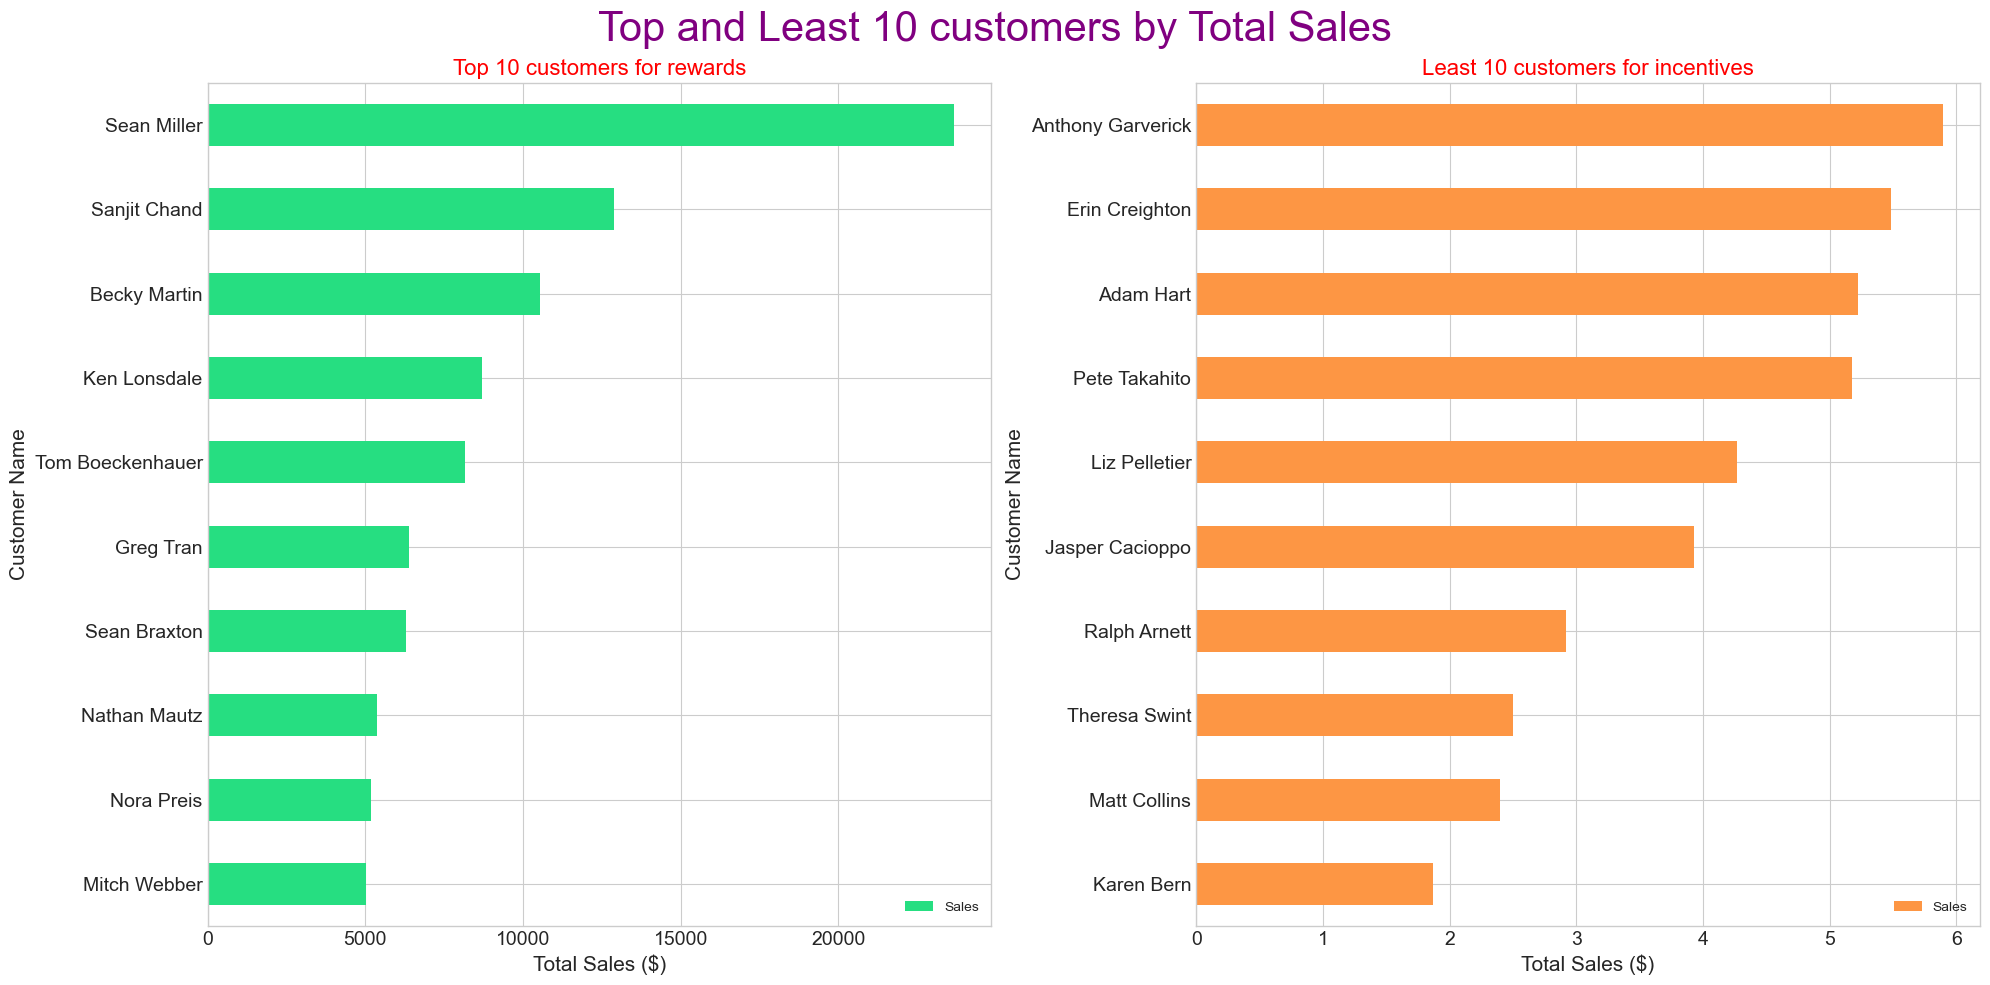

In [296]:
# Plotting the graph for Top and least 10 customers by total sales

fig, axs = plt.subplots(1, 2, figsize = (20, 10))

top_10_customers.sort_values("Sales", ascending = True).plot.barh(ax = axs[0],
                          color = "#26de81",
                          fontsize = 14)
axs[0].set_title("Top 10 customers for rewards", fontsize = 16, color = 'red')
axs[0].set_xlabel('Total Sales ($)', fontsize = 15)
axs[0].set_ylabel('Customer Name', fontsize = 15)

least_10_customers.sort_values("Sales", ascending = True).plot.barh(ax = axs[1],
                          color = "#fd9644",
                          fontsize = 14)
axs[1].set_title("Least 10 customers for incentives", fontsize = 16, color = 'red')
axs[1].set_xlabel('Total Sales ($)', fontsize = 15)
axs[1].set_ylabel('Customer Name', fontsize = 15)

plt.suptitle("Top and Least 10 customers by Total Sales", fontsize = 30, color = 'purple')
plt.tight_layout()
plt.show()

#### For reward purpose, superstore can gift these top 10 customers for the total amount they spent on sales

#### 'Sean Miller', 'Sanjit Chand', 'Becky Martin', 'Ken Lonsdale', 'Tom Boeckenhauer', 'Greg Tran', 'Sean Braxton', 'Nathan Mautz', 'Nora Preis', 'Mitch Webber'

#### For incentive purpose, superstore can gift these least 10 customers

#### 'Anthony Garverick', 'Erin Creighton', 'Adam Hart', 'Pete Takahito', 'Liz Pelletier', 'Jasper Cacioppo', 'Ralph Arnett', 'Theresa Swint', 'Matt Collins', 'Karen Bern'

### 14) 5 top and least states and cities by total revenue generation

In [272]:
# Customer states by total sales

customer_states = superst.groupby('State')['Sales'].sum().reset_index()
customer_states

,State,Sales
0,Alabama,6139.0900
1,Arizona,8295.2350
2,Arkansas,6302.6900
3,California,91303.5310
4,Colorado,6502.2940
5,Connecticut,2794.0200
6,Delaware,4786.0300
7,Florida,34248.2605
8,Georgia,4540.1000
9,Idaho,465.2160


In [282]:
# Least 5 customer state by total sales
least_5_customer_state = customer_states.sort_values('Sales', ascending=False).tail(5)

# Set customer state as index
least_5_customers_state = least_5_customer_state.set_index("State")
least_5_customers_state

,Sales
State,
New Hampshire,504.480
Idaho,465.216
Montana,424.488
Nebraska,210.020
South Dakota,162.150


In [281]:
# Top 5 customer state by total sales
top_5_customer_state = customer_states.sort_values('Sales', ascending=False).head(5)

# Set customer state as index
top_5_customers_state = top_5_customer_state.set_index("State")
top_5_customers_state

,Sales
State,
California,91303.5310
New York,64788.4870
Texas,50625.1766
Florida,34248.2605
Washington,29871.5760


In [283]:
# Customer city by total sales

customer_city = superst.groupby('City')['Sales'].sum().reset_index()
customer_city

,City,Sales
0,Akron,170.910
1,Albuquerque,615.492
2,Alexandria,5221.090
3,Anaheim,1049.970
4,Apopka,193.152
...,...,...
263,Westland,920.576
264,Wilmington,1943.012
265,Woodstock,295.500
266,Woonsocket,52.960


In [284]:
# Top 5 customer city by total sales
top_5_customer_city = customer_city.sort_values('Sales', ascending=False).head(5)

# Set customer city as index
top_5_customers_city = top_5_customer_city.set_index("City")
top_5_customers_city

,Sales
City,
New York City,44361.0890
San Francisco,30983.5120
Los Angeles,28882.6965
Jacksonville,25808.1250
Seattle,23531.9940


In [285]:
# Least 5 customer city by total sales
least_5_customer_city = customer_city.sort_values('Sales', ascending=False).tail(5)

# Set customer city as index
least_5_customers_city = least_5_customer_city.set_index("City")
least_5_customers_city

,Sales
City,
North Miami,7.632
Cedar Hill,7.080
Orlando,6.642
Port Arthur,5.184
Boca Raton,4.608


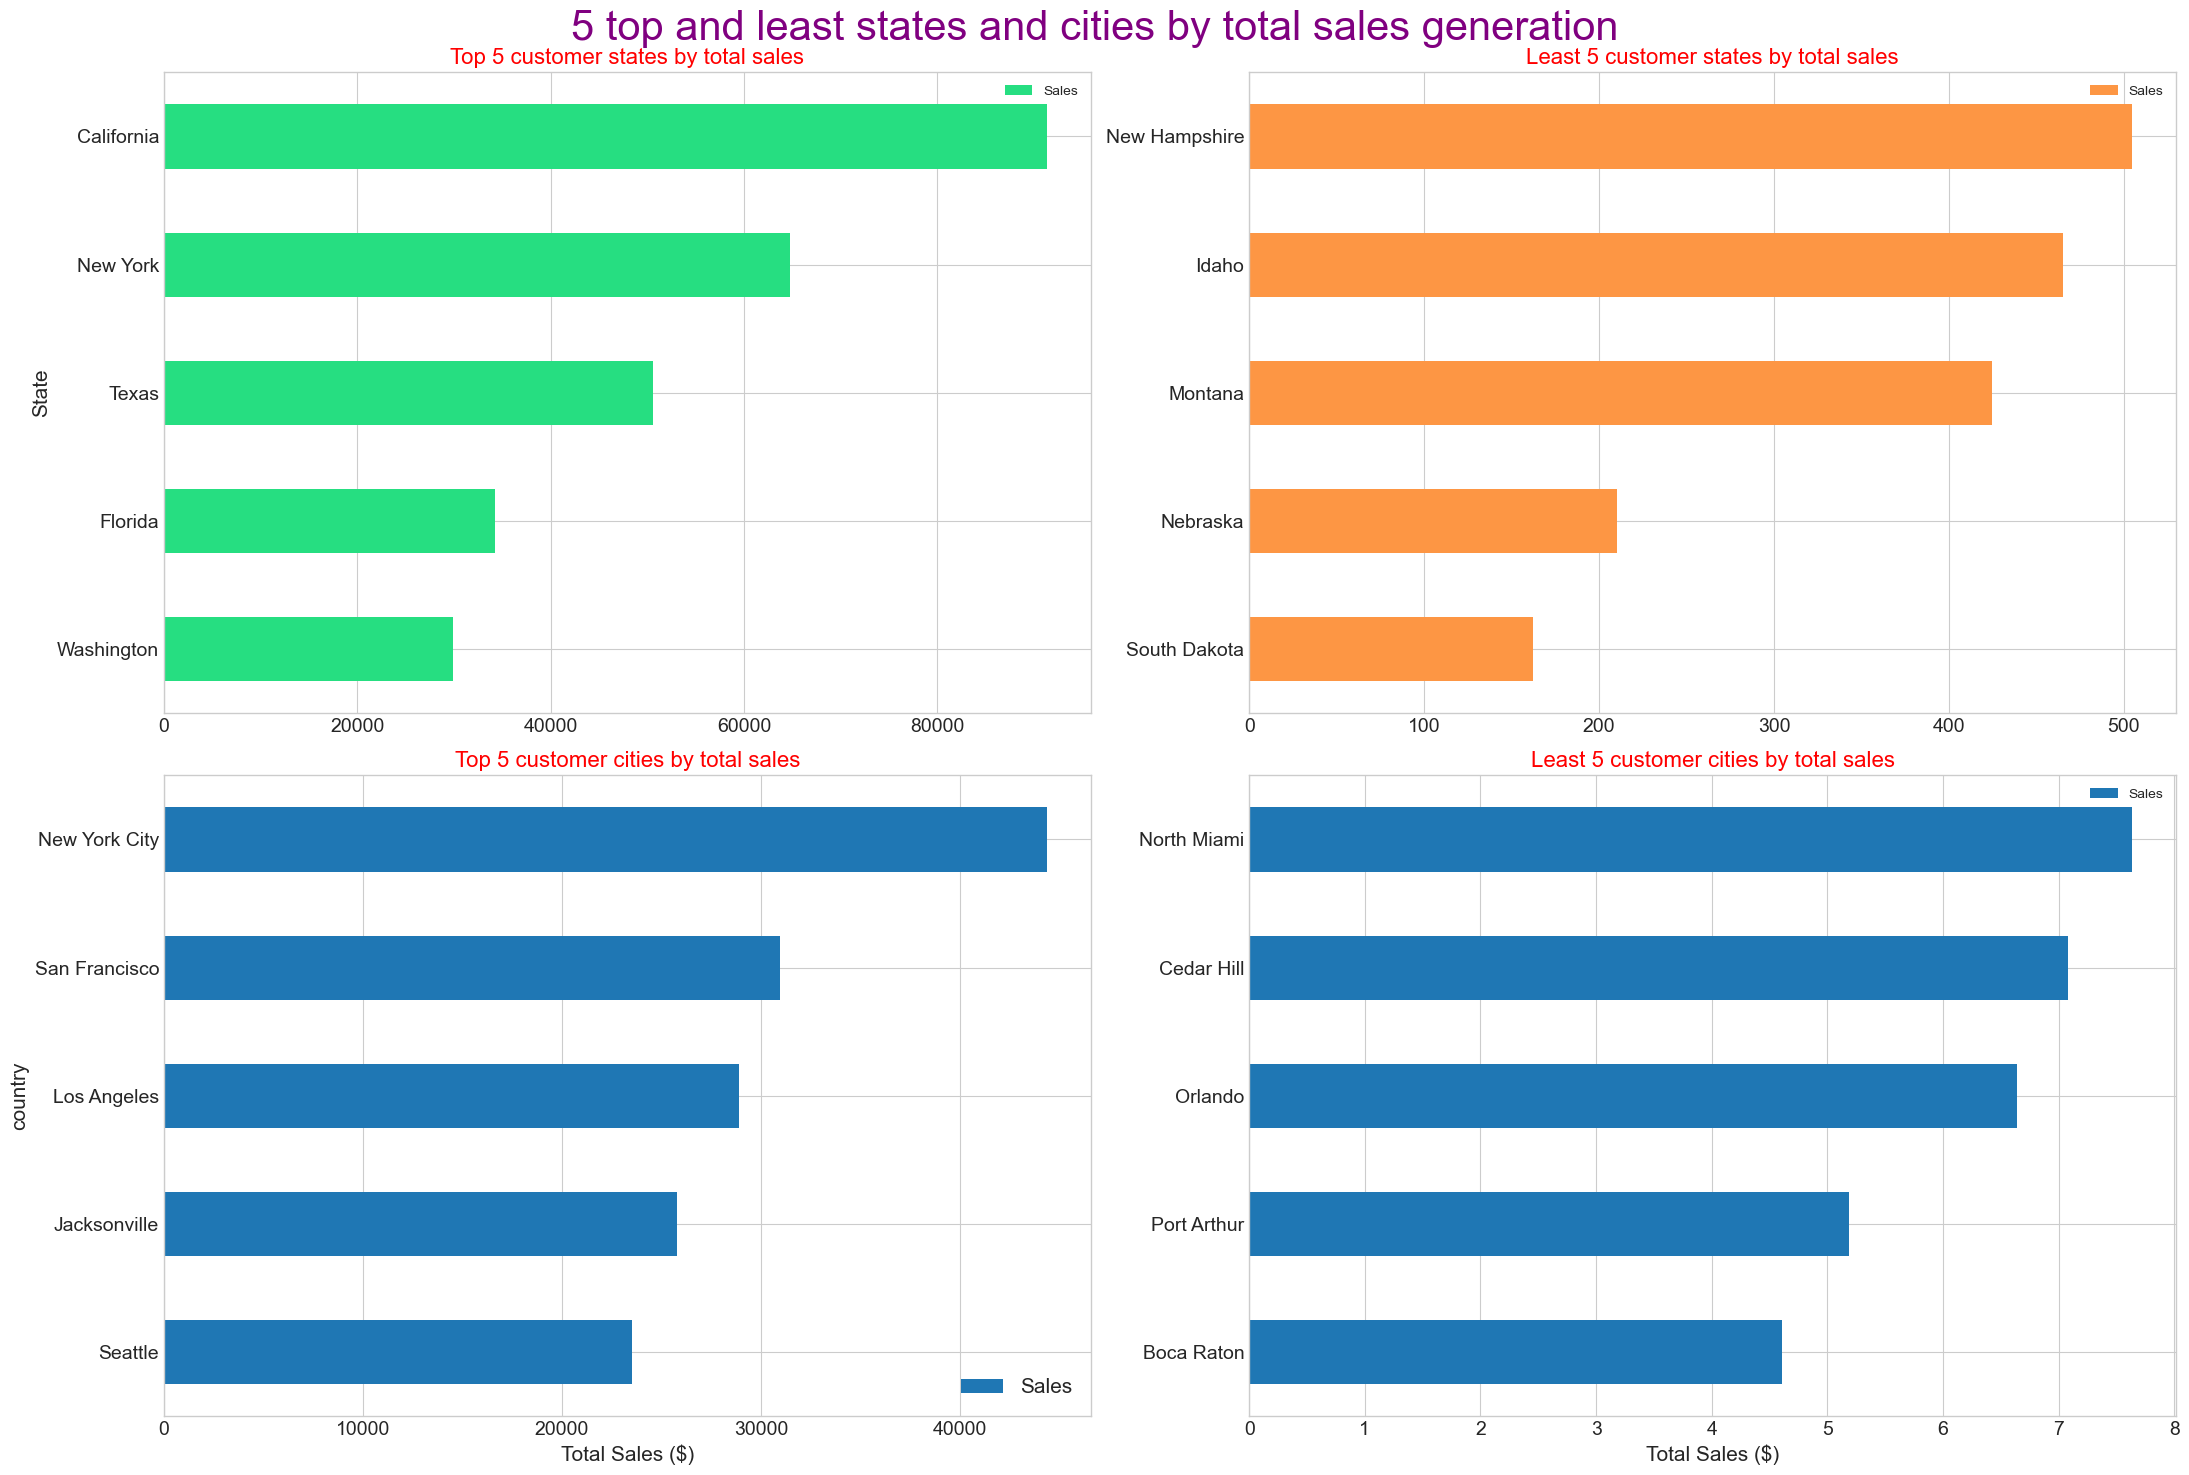

In [290]:
fig, axs = plt.subplots(2, 2, figsize = (22, 15))

top_5_customers_state.sort_values("Sales", ascending = True).plot.barh(ax = axs[0][0],
                                 color = "#26de81",
                                 fontsize = 14)
axs[0][0].set_title("Top 5 customer states by total sales", fontsize = 16, color = 'red')
axs[0][0].set_ylabel('State', fontsize = 15)


least_5_customers_state.sort_values("Sales", ascending = True).plot.barh(ax = axs[0][1],
                                 color = "#fd9644",
                                 fontsize = 14)
axs[0][1].set_title("Least 5 customer states by total sales", fontsize = 16, color = 'red')
axs[0][1].set_ylabel('')


top_5_customers_city.sort_values("Sales", ascending = True).plot.barh(ax = axs[1][0],
                            fontsize = 14)
axs[1][0].set_title("Top 5 customer cities by total sales", fontsize = 16, color = 'red')
axs[1][0].set_xlabel('Total Sales ($)', fontsize = 15)
axs[1][0].set_ylabel('country', fontsize = 15)
axs[1][0].legend(fontsize = 15)


least_5_customers_city.sort_values("Sales", ascending = True).plot.barh(ax = axs[1][1],
                           fontsize = 14)
axs[1][1].set_title("Least 5 customer cities by total sales", fontsize = 16, color = 'red')
axs[1][1].set_xlabel('Total Sales ($)', fontsize = 15)
axs[1][1].set_ylabel('')

plt.suptitle("5 top and least states and cities by total sales generation", fontsize = 30, color = 'purple')
plt.tight_layout()
plt.show()

#### From 5 top and least states and cities by total sales generation image above, We can deduct that the :-

#### Top 5 customer states by total sales are 'California', 'New York', 'Texas', 'Florida', 'Washington'

#### Least 5 customer states by total sales are 'New Hampshire', 'Idaho', 'Montana', 'Nebraska', 'South Dakota'

#### Least 5 customer cities by total sales are 'North Miami', 'Cedar Hill', 'Orlando', 'Port Arthur', 'Boca Raton'

#### Top 5 customer cities by total sales are 'New York City', 'San Francisco', 'Los Angeles', 'Jacksonville', 'Seattle'

### 15) Checking for outliers in the profit column/data (Significance)

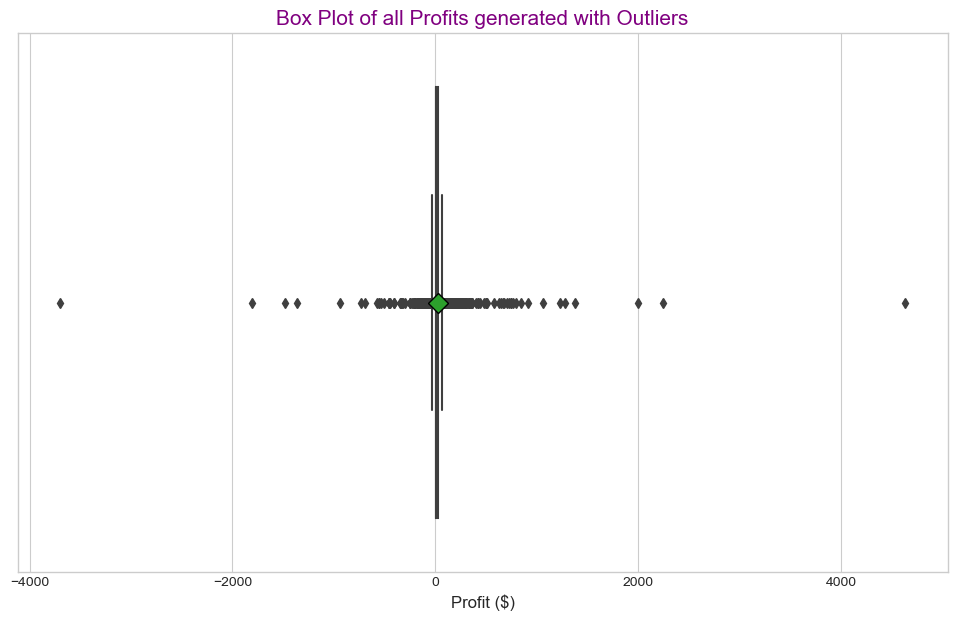

In [302]:
# To check for outliers, we can use Boxplot and Interquartile range method to find the values of these outliers
# Using the Boxplot method
# Note - The marker in the diagram (Box Plot of all Commodity Prices with Outliers) represent the average price mark

sns.set_style("whitegrid")
plt.figure(figsize=(12, 7))
sns.boxplot(data = superst, x = 'Profit', showmeans = True,
           meanprops={"marker": "D", "markeredgecolor": "black","markersize": "10"})
plt.title('Box Plot of all Profits generated with Outliers', fontsize = 15, color = 'purple')
plt.xlabel('Profit ($)', fontsize = 12)
plt.show()

In [304]:
# Mean Profit for all products ($24.86)

superst['Profit'].mean().round(2)

24.86

In [306]:
# Median Profit for all products ($8.22)

superst['Profit'].median()

8.217

#### There is a positive skewed distribution in the profit column, that means most of the profits data are below average profit amount of $24.86 (mean > median)

In [307]:
# From the image above there are alot of abnormal profit amount in the profit column (outliers)
# We can use Interquartile range method to find the values of these outliers (IQRange)

Q1 = superst['Profit'].quantile(0.25)
Q3 = superst['Profit'].quantile(0.75)

IQRange = Q3 - Q1

# Define lower and upper bound
lower_bound = Q1 - 1.5 * IQRange
upper_bound = Q3 + 1.5 * IQRange

# Identify outliers
outliers = superst.loc[(superst['Profit'] < lower_bound) | (superst['Profit'] > upper_bound)]

outliers.sort_values('Profit', ascending = False)

,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Delivery Time (Days),Cost,Original Revenue
689,2014-09-23,2014-09-28,Standard Class,SC-20095,Sanjit Chand,Consumer,Minneapolis,Minnesota,Central,Office Supplies,Binders,Ibico EPK-21 Electric Binding System,9449.950,5,0.0,4630.4755,5,4819.4745,9449.95
923,2014-12-14,2014-12-21,Standard Class,TB-21400,Tom Boeckenhauer,Consumer,New York City,New York,East,Technology,Machines,HP Designjet T520 Inkjet Large Format Printer ...,6999.960,4,0.0,2239.9872,7,4759.9728,6999.96
905,2014-11-04,2014-11-09,Standard Class,NM-18445,Nathan Mautz,Home Office,New York City,New York,East,Technology,Machines,Canon imageCLASS MF7460 Monochrome Digital Las...,3991.980,2,0.0,1995.9900,5,1995.9900,3991.98
917,2014-09-14,2014-09-14,Same Day,DM-13015,Darrin Martin,Consumer,New York City,New York,East,Technology,Machines,Ativa V4110MDD Micro-Cut Shredder,2799.960,4,0.0,1371.9804,0,1427.9796,2799.96
623,2014-05-21,2014-05-25,Standard Class,MW-18235,Mitch Willingham,Corporate,Virginia Beach,Virginia,South,Office Supplies,Binders,Fellowes PB300 Plastic Comb Binding Machine,2715.930,7,0.0,1276.4871,4,1439.4429,2715.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1758,2014-09-19,2014-09-24,Standard Class,JL-15835,John Lee,Consumer,Charlotte,North Carolina,South,Technology,Machines,HP Designjet T520 Inkjet Large Format Printer ...,2624.985,3,0.5,-944.9946,5,3569.9796,5249.97
1686,2014-09-08,2014-09-12,Standard Class,BM-11140,Becky Martin,Consumer,San Antonio,Texas,Central,Technology,Machines,Lexmark MX611dhe Monochrome Laser Printer,8159.952,8,0.4,-1359.9920,4,9519.9440,13599.92
1893,2014-11-11,2014-11-15,Standard Class,KD-16270,Karen Daniels,Consumer,Houston,Texas,Central,Office Supplies,Binders,GBC DocuBind TL300 Electric Binding System,896.990,5,0.8,-1480.0335,4,2377.0235,4484.95
1725,2014-03-18,2014-03-23,Standard Class,SM-20320,Sean Miller,Home Office,Jacksonville,Florida,South,Technology,Machines,Cisco TelePresence System EX90 Videoconferenci...,22638.480,6,0.5,-1811.0784,5,24449.5584,45276.96


##### What could be the potential reasons for these profit outliers?

In [309]:
# The profit outliers exist for some reasons
# We can check all columns of these outliers to find out

# a) Outlier Count over months (Order date)

outliers['Order Date'].dt.month.value_counts()

11    69
12    65
9     54
8     31
6     29
3     26
10    25
4     24
7     24
5     24
1     15
2      4
Name: Order Date, dtype: int64

In [310]:
# b) Outlier Count over Ship Mode

outliers['Ship Mode'].value_counts()

Standard Class    236
Second Class       77
First Class        59
Same Day           18
Name: Ship Mode, dtype: int64

In [311]:
# c) Outlier Count over Segment

outliers['Segment'].value_counts()

Consumer       214
Corporate      116
Home Office     60
Name: Segment, dtype: int64

In [312]:
# d) Outlier Count over State

outliers['State'].value_counts()

California        56
New York          45
Texas             41
Illinois          28
Pennsylvania      23
Washington        21
Virginia          17
Ohio              16
Massachusetts     12
Florida           10
Arizona           10
Michigan           8
Colorado           8
Arkansas           7
North Carolina     7
Kentucky           7
Rhode Island       6
Georgia            6
Alabama            6
New Jersey         6
Oregon             5
Minnesota          5
Tennessee          4
Oklahoma           4
Delaware           3
Utah               3
Wisconsin          3
Connecticut        3
Nevada             3
South Carolina     2
Maryland           2
Mississippi        2
Kansas             2
Louisiana          2
Maine              2
Missouri           1
New Mexico         1
Indiana            1
Montana            1
Iowa               1
Name: State, dtype: int64

In [313]:
# e) Outlier Count over City

outliers['City'].value_counts()

New York City    32
Philadelphia     21
San Francisco    20
Los Angeles      17
Seattle          16
                 ..
Troy              1
Indianapolis      1
Alexandria        1
Woodstock         1
Smyrna            1
Name: City, Length: 153, dtype: int64

In [314]:
# f) Outlier Count over Region

outliers['Region'].value_counts()

East       118
West       108
Central     94
South       70
Name: Region, dtype: int64

In [315]:
# g) Outlier Count over Category

outliers['Category'].value_counts()

Office Supplies    135
Furniture          132
Technology         123
Name: Category, dtype: int64

In [316]:
# h) Outlier Count over Sub-Category

outliers['Sub-Category'].value_counts()

Phones         63
Chairs         52
Tables         52
Binders        42
Storage        32
Accessories    28
Appliances     23
Machines       22
Paper          21
Bookcases      16
Furnishings    12
Copiers        10
Envelopes       6
Labels          4
Art             4
Supplies        3
Name: Sub-Category, dtype: int64

##### ANSWER - Potential reasons for these profit outliers are
    * Most of these anomaly profit occurs in the September, November and december
    
    * Ship mode for these profit outliers is Standard class
    
    * Consumers in the segment section generates the most anomaly profits
      
    * California, New york and texas are states where anomaly profits occur the most
      
    * Anomaly profits are generated in the west and the east region the most, no wonder they exhibit large sales (See image in question 7 (Revenue of all regions))
    
    * All categories exhibit profit anomaly, but Office Supplies generates the most. Sub categories like phones , chairs and tables also generates the most profit anomaly.

<span style="background-color:DarkSlateGray;
             color:LightCyan;
             font-size:40px;
             text-align:center;
               border-radius:20px 70px;
             font-weight:bold;
              padding:25px 80px;"> Data Story: Superstore 2014 Performance Analysis
</span>

## In 2014, the Superstore generated $484,247.50 in total sales from 7,581 units sold , revealing both opportunities and challenges. Let’s break down the story behind the numbers:

### Recommendations to Boost Performance
#### 1) Optimize Discount Strategy :
##### Eliminate discounts above 20% and introduce tiered pricing for bulk buyers.
#### 2) Focus on High-Performing Regions :
##### Invest in marketing and inventory for California , New York , and Texas .
##### Launch campaigns to revitalize the Central Region (e.g., Nebraska, South Dakota).
#### 3) Streamline Shipping :
##### Promote Standard Class as the default option to balance cost and delivery time.
##### Offer free Standard shipping for orders over $500 to incentivize larger purchases.
#### 4) Revamp Underperforming Categories :
##### Investigate Furniture costs (e.g., tables, bookcases) and adjust pricing or suppliers.
##### Bundle low-selling products (e.g., binders) with high-demand items like printers.
#### 5) Leverage Seasonal Trends :
##### Launch back-to-school and holiday campaigns 1–2 months earlier to capture early demand.
##### Introduce limited-time offers in February (post-holiday lull).
#### 6) Customer Engagement :
##### Create a loyalty program for top spenders (e.g., free expedited shipping).
##### Send personalized discounts to low-spending customers (e.g., 10% off Office Supplies ).
#### 7) Investigate Profit Outliers :
##### Audit orders with negative profits in Office Supplies and Technology to identify cost leaks.